Libraries imported successfully!
Data loaded successfully!
Providers: 1000 records
Receivers: 1000 records
Food Listings: 1000 records
Claims: 1000 records

==================== PROVIDERS DATASET ====================
Shape: (1000, 6)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None

First 5 rows:
   Provider_ID                         Name           Type  \
0            1             Gonzales-Cochran    Supermarket   
1            2  Nielsen, Johnson and Fuller  Grocery Store   
2            3                 Miller-Black    Supermarket   


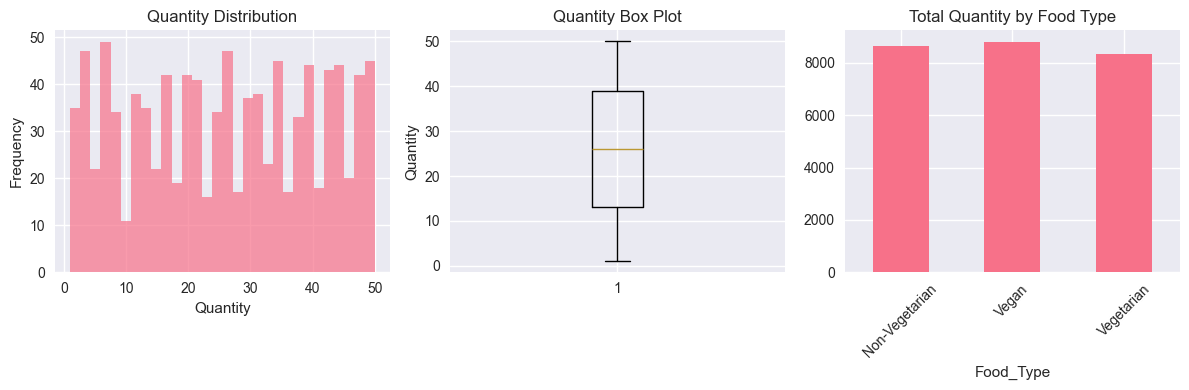


6. DATE ANALYSIS:
Expiry Date Range: 2025-03-16 00:00:00 to 2025-03-30 00:00:00
Claims Timestamp Range: 2025-03-01 00:09:00 to 2025-03-21 06:12:00

Claims by Month:
Month
March    1000
Name: count, dtype: int64

7. SUMMARY STATISTICS:
Total Food Quantity Available: 25,794
Average Food Quantity per Listing: 25.79
Total Claims Made: 1,000
Completed Claims: 339
Success Rate: 33.90%

Data exploration completed! Ready for cleaning and database creation.


In [1]:
# Local Food Wastage Management - Data Exploration
# ================================================

# Cell 1: Import Libraries and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("="*50)

# Cell 2: Load the Data
# Update these paths according to your file locations
providers_df = pd.read_csv('../data/raw/providers_data.csv')
receivers_df = pd.read_csv('../data/raw/receivers_data.csv')
food_listings_df = pd.read_csv('../data/raw/food_listings_data.csv')
claims_df = pd.read_csv('../data/raw/claims_data.csv')

print("Data loaded successfully!")
print(f"Providers: {len(providers_df)} records")
print(f"Receivers: {len(receivers_df)} records")
print(f"Food Listings: {len(food_listings_df)} records")
print(f"Claims: {len(claims_df)} records")

# Cell 3: Basic Data Overview
def explore_dataset(df, name):
    print(f"\n{'='*20} {name.upper()} DATASET {'='*20}")
    print(f"Shape: {df.shape}")
    print(f"\nColumn Info:")
    print(df.info())
    print(f"\nFirst 5 rows:")
    print(df.head())
    print(f"\nMissing values:")
    print(df.isnull().sum())
    print(f"\nDuplicate rows: {df.duplicated().sum()}")
    
# Explore each dataset
explore_dataset(providers_df, "Providers")
explore_dataset(receivers_df, "Receivers")
explore_dataset(food_listings_df, "Food Listings")
explore_dataset(claims_df, "Claims")

# Cell 4: Data Quality Checks
print("DATA QUALITY ANALYSIS")
print("="*50)

# Check data types
print("\n1. DATA TYPES:")
for df_name, df in [('Providers', providers_df), ('Receivers', receivers_df), 
                    ('Food Listings', food_listings_df), ('Claims', claims_df)]:
    print(f"\n{df_name}:")
    print(df.dtypes)

# Cell 5: Unique Values Analysis
print("\n2. UNIQUE VALUES ANALYSIS:")
print(f"Unique Providers: {providers_df['Provider_ID'].nunique()}")
print(f"Unique Receivers: {receivers_df['Receiver_ID'].nunique()}")
print(f"Unique Food Items: {food_listings_df['Food_ID'].nunique()}")
print(f"Unique Claims: {claims_df['Claim_ID'].nunique()}")

# Check for ID overlaps (data integrity)
print(f"\nProvider IDs in food_listings: {food_listings_df['Provider_ID'].nunique()}")
print(f"Receiver IDs in claims: {claims_df['Receiver_ID'].nunique()}")
print(f"Food IDs in claims: {claims_df['Food_ID'].nunique()}")

# Cell 6: Categorical Data Analysis
print("\n3. CATEGORICAL DATA ANALYSIS:")

# Provider types
print(f"\nProvider Types:")
print(providers_df['Type'].value_counts())

# Receiver types
print(f"\nReceiver Types:")
print(receivers_df['Type'].value_counts())

# Food types
print(f"\nFood Types:")
print(food_listings_df['Food_Type'].value_counts())

# Meal types
print(f"\nMeal Types:")
print(food_listings_df['Meal_Type'].value_counts())

# Claim statuses
print(f"\nClaim Statuses:")
print(claims_df['Status'].value_counts())

# Cell 7: Geographic Distribution
print("\n4. GEOGRAPHIC DISTRIBUTION:")

# Cities with providers
print(f"\nCities with Providers ({providers_df['City'].nunique()} unique cities):")
print(providers_df['City'].value_counts().head(10))

# Cities with receivers
print(f"\nCities with Receivers ({receivers_df['City'].nunique()} unique cities):")
print(receivers_df['City'].value_counts().head(10))

# Food listing locations
print(f"\nFood Listing Locations ({food_listings_df['Location'].nunique()} unique locations):")
print(food_listings_df['Location'].value_counts().head(10))

# Cell 8: Quantity Analysis
print("\n5. QUANTITY ANALYSIS:")
print(f"Food Quantities Statistics:")
print(food_listings_df['Quantity'].describe())

# Visualize quantity distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(food_listings_df['Quantity'], bins=30, alpha=0.7)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(food_listings_df['Quantity'])
plt.title('Quantity Box Plot')
plt.ylabel('Quantity')

plt.subplot(1, 3, 3)
food_listings_df.groupby('Food_Type')['Quantity'].sum().plot(kind='bar')
plt.title('Total Quantity by Food Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Cell 9: Date Analysis (Expiry Dates & Timestamps)
print("\n6. DATE ANALYSIS:")

# Convert date columns
food_listings_df['Expiry_Date'] = pd.to_datetime(food_listings_df['Expiry_Date'])
claims_df['Timestamp'] = pd.to_datetime(claims_df['Timestamp'])

print(f"Expiry Date Range: {food_listings_df['Expiry_Date'].min()} to {food_listings_df['Expiry_Date'].max()}")
print(f"Claims Timestamp Range: {claims_df['Timestamp'].min()} to {claims_df['Timestamp'].max()}")

# Claims by month
claims_df['Month'] = claims_df['Timestamp'].dt.month_name()
print(f"\nClaims by Month:")
print(claims_df['Month'].value_counts())

# Cell 10: Summary Statistics
print("\n7. SUMMARY STATISTICS:")
print(f"Total Food Quantity Available: {food_listings_df['Quantity'].sum():,}")
print(f"Average Food Quantity per Listing: {food_listings_df['Quantity'].mean():.2f}")
print(f"Total Claims Made: {len(claims_df):,}")
print(f"Completed Claims: {(claims_df['Status'] == 'Completed').sum():,}")
print(f"Success Rate: {(claims_df['Status'] == 'Completed').sum() / len(claims_df) * 100:.2f}%")

print("\nData exploration completed! Ready for cleaning and database creation.")